In [ ]:
# Step 1: Import pandas and load your CSV
import pandas as pd

# Replace with the path to your CSV file
df = pd.read_excel("/content/emas_reviews.xlsx")

# Display the first 5 rows to check it loaded correctly
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/emas_reviews.xlsx'

In [ ]:
df.isnull().sum()

,0
review_id,0
review_text,0
label,0


In [ ]:
df.shape

(2596, 3)

In [ ]:
df['label'].unique()

array(['positive', 'negative', 'Positive', 'Negative', 'Neutral'],
      dtype=object)

In [ ]:
# Convert all labels to lowercase
df['label'] = df['label'].str.strip().str.lower()

# Preview unique labels after cleaning
print("Unique labels after cleaning:", df['label'].unique())

# Preview first 5 rows
df.head()


Unique labels after cleaning: ['positive' 'negative' 'neutral']


,review_id,review_text,label
0,user10001,Just took the e.MAS 7 for a spin and ngl it su...,positive
1,user10002,e.MAS 7 looks kinda fire on the road 🔥 The scr...,positive
2,user10003,I’ve been driving the e.MAS 7 for a week now a...,positive
3,user10004,This car lowkey ate 💅 The tech features on e.M...,positive
4,user10005,e.MAS 7 really said futuristic 😎 The dashboard...,positive


In [ ]:
#Map sentiment labels to numeric values
label_dict = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label'] = df['label'].map(label_dict)

# Display first 5 rows to check
df.head()

,review_id,review_text,label
0,user10001,Just took the e.MAS 7 for a spin and ngl it su...,2
1,user10002,e.MAS 7 looks kinda fire on the road 🔥 The scr...,2
2,user10003,I’ve been driving the e.MAS 7 for a week now a...,2
3,user10004,This car lowkey ate 💅 The tech features on e.M...,2
4,user10005,e.MAS 7 really said futuristic 😎 The dashboard...,2


In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and test (80% train, 20% test)
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df['label'],   # keep the label distribution same in train/test
    random_state=42
)

# Show the first 5 rows of training and test sets
print("Training set:")
display(train_df.head())

print("\nTest set:")
display(test_df.head())


Training set:


,review_id,review_text,label
1827,user11828,The aircon fan is too loud. It ruins the quiet...,0
1578,user11579,The 540-degree camera is a cool trick. I can s...,2
2312,user12313,The speed limit warning is incredibly annoying...,0
773,user10774,Interior layout is practical and neat,2
358,user10359,Noise in the cabin is way too much,0



Test set:


,review_id,review_text,label
74,user10075,The screen responsiveness in e.MAS 7 is actual...,2
677,user10678,Exterior details look classy,2
167,user10168,e.MAS 7 handles bumps pretty well. Ride qualit...,2
2504,user12505,It’s a very safe choice for families. The 5-st...,2
1222,user11223,"Gas car shakes on small bumps, EV smooth AF",2


In [ ]:
len(train_df), len(test_df)

(2076, 520)

In [ ]:
# Step 4: Hugging Face Dataset and Tokenization

from datasets import Dataset
from transformers import BertTokenizer

# Convert pandas DataFrames to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Load the tokenizer for bert-base-uncased
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenization function
def tokenize(batch):
    return tokenizer(
        batch['review_text'],
        padding='max_length',  # pad all sequences to max_length
        truncation=True,
        max_length=128
    )

# Apply tokenization
train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

# Set format for PyTorch
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# Preview a tokenized example
print(train_dataset[0])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/2076 [00:00<?, ? examples/s]

Map:   0%|          | 0/520 [00:00<?, ? examples/s]

{'label': tensor(0), 'input_ids': tensor([ 101, 1996, 2250, 8663, 5470, 2003, 2205, 5189, 1012, 2009, 8435, 1996,
        4251, 2791, 1997, 1996, 3751, 3298, 1012,  100,  102,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0,

In [ ]:
from transformers import BertForSequenceClassification

# Load bert-base-uncased for sequence classification with 3 labels
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=3
)

# Print model architecture summary
print(model)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
!pip install evaluate
import evaluate

# Load accuracy metric
metric = evaluate.load("accuracy")

# Function for computing metrics during training
def compute_metrics(p):
    preds = p.predictions.argmax(-1)  # get predicted class
    labels = p.label_ids                # true labels
    return metric.compute(predictions=preds, references=labels)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
from transformers import TrainingArguments, Trainer

# Compatible TrainingArguments for older transformers
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    logging_dir='./logs',
    learning_rate=2e-5,
    do_train=True,
    do_eval=True
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)


In [ ]:
# Fine-tune BERT
trainer.train()

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 3


wandb: You chose "Don't visualize my results"


Step,Training Loss
500,0.270700


TrainOutput(global_step=780, training_loss=0.18925205499697953, metrics={'train_runtime': 623.5002, 'train_samples_per_second': 9.989, 'train_steps_per_second': 1.251, 'total_flos': 409667591402496.0, 'train_loss': 0.18925205499697953, 'epoch': 3.0})

In [ ]:
# Evaluate model on test set
results = trainer.evaluate()
print("Evaluation results:", results)

Evaluation results: {'eval_loss': 0.19552800059318542, 'eval_accuracy': 0.9653846153846154, 'eval_runtime': 5.1085, 'eval_samples_per_second': 101.792, 'eval_steps_per_second': 12.724, 'epoch': 3.0}


In [ ]:
# Save trained model
model.save_pretrained("sentiment_bert_model")
tokenizer.save_pretrained("sentiment_bert_model")

('sentiment_bert_model/tokenizer_config.json',
 'sentiment_bert_model/special_tokens_map.json',
 'sentiment_bert_model/vocab.txt',
 'sentiment_bert_model/added_tokens.json')

In [ ]:
import torch

# Example: Predict a single review
test_review = "the car is peak"
inputs = tokenizer(test_review, padding='max_length', truncation=True, max_length=128, return_tensors="pt")

# Move tensors to GPU if available
inputs = {k: v.to(model.device) for k, v in inputs.items()}

# Get model prediction
with torch.no_grad():
    outputs = model(**inputs)
    preds = torch.argmax(outputs.logits, dim=1)

# Map prediction to label
label_map = {0: "negative", 1: "neutral", 2: "positive"}
print("Predicted sentiment:", label_map[preds.item()])

Predicted sentiment: positive


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Get predictions from the trained model on the test dataset
predictions_output = trainer.predict(test_dataset)

# The 'predictions' attribute of the output contains the logits.
# We take argmax along dimension 1 to get the predicted class indices (0, 1, or 2).
y_pred_numeric = predictions_output.predictions.argmax(axis=1)

# The true labels are already numeric (0, 1, 2) in test_df['label']
y_true_numeric = test_df['label'].tolist()

# Generate classification report using the numeric true and predicted labels
report = classification_report(y_true_numeric, y_pred_numeric, digits=4)
print("Classification Report:\n")
print(report)

# Map numeric predictions back to string labels for better readability in the confusion matrix
# label_map is available in the kernel state
pred_labels_str = [label_map[i] for i in y_pred_numeric]
true_labels_str = [label_map[i] for i in y_true_numeric] # Also map true labels for consistent string representation

# Create DataFrame
df_compare = pd.DataFrame({
    'True': true_labels_str,
    'Predicted': pred_labels_str
})

# Count combinations of true vs predicted labels
conf_matrix = pd.crosstab(df_compare['True'], df_compare['Predicted'])
print("\nConfusion Matrix:\n") # Added a print for clarity
print(conf_matrix)

Classification Report:

              precision    recall  f1-score   support

           0     0.9471    0.9817    0.9641       219
           1     0.8571    0.8824    0.8696        34
           2     0.9961    0.9625    0.9790       267

    accuracy                         0.9654       520
   macro avg     0.9335    0.9422    0.9376       520
weighted avg     0.9664    0.9654    0.9656       520


Confusion Matrix:

Predicted  negative  neutral  positive
True                                  
negative        215        3         1
neutral           4       30         0
positive          8        2       257


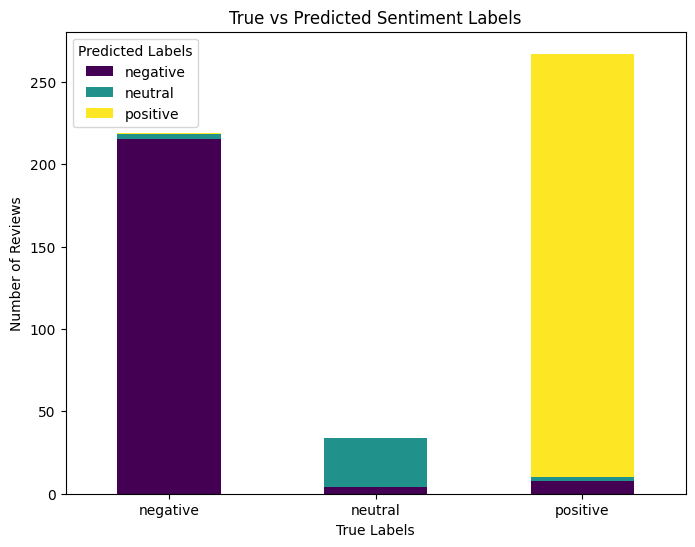

In [ ]:
import matplotlib.pyplot as plt

# Plot stacked bar chart
conf_matrix.plot(kind='bar', stacked=True, figsize=(8,6), colormap='viridis')

plt.title("True vs Predicted Sentiment Labels")
plt.xlabel("True Labels")
plt.ylabel("Number of Reviews")
plt.legend(title='Predicted Labels')
plt.xticks(rotation=0)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# The 'preds' variable from the previous cell is only for a single example.
# To generate a classification report for the entire test set, we need to get
# predictions for all samples in the test_dataset.

# Get predictions from the trained model on the test dataset
predictions_output = trainer.predict(test_dataset)

# The 'predictions' attribute of the output contains the logits.
# We take argmax along dimension 1 to get the predicted class indices (0, 1, or 2).
y_pred_numeric = predictions_output.predictions.argmax(axis=1)

# The true labels are already numeric (0, 1, 2) in test_df['label']
y_true_numeric = test_df['label'].tolist()

# Generate classification report using the numeric true and predicted labels
report = classification_report(y_true_numeric, y_pred_numeric, digits=4)
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

           0     0.9471    0.9817    0.9641       219
           1     0.8571    0.8824    0.8696        34
           2     0.9961    0.9625    0.9790       267

    accuracy                         0.9654       520
   macro avg     0.9335    0.9422    0.9376       520
weighted avg     0.9664    0.9654    0.9656       520

